# TP 4 Regression logistique avec régularisation
Dans ce TP, nous aimerions faire une classification binaire en utilisant la régression.

Pour ce faire, nous étudierons un ensemble de données avec la variable  (y) representant la commercialisation d'un profuit et les caractéristiques (X) representant les résultat des tests de qualité test 1 et test 2 du produit.

La prédiction se fera avec l'agorithme de descente du gradient avec régularisation.

# Importation des librairies necessaires au travail

In [325]:
import numpy as np
import matplotlib.pyplot as plt
import utils



# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [2]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=float)
data.shape

(118, 3)

Dans ces données (data), la première colonne represente la première note, la deuxieme colonne la deuxième note et la troisième colonne represente la commercialisation (1 oui 0 non).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [3]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0:2]))
y = data[:, 2];
# forcer y à avoir une seule colonne
y = y.reshape( y.shape[0], 1)

In [4]:
print('X', X.shape ,' y ', y.shape)

X (118, 3)  y  (118, 1)


# Transformation de données
Dans cette partie, nous aimerions transformer nos données afin d'avoir une fonction polynomiale de degrée 6.

La fonction sera:

$x_0=1$

$x_1=x_1$

$x_2=x_2$

$x_3={x_1}^2$

$x_4={x_1}x_2$

$x_5={x_2}^2$

$x_6={x_1}^3$

$x_7={x_1}^2 x_2$

$x_8= x_1 {x_2}^2$

$x_9= {x_2}^3$

...


Pour un polynme de degrée 6 à 2 variables nous aurons 28 caracteristiques

**Question**: comment avons nous trouvé ce chiffre?

**Astuce**: référez vous aux probabilités

In [375]:
def mapping(X):
    
    cols = 28
    degree=7
    outX= np.ones((X.shape[0],cols))
    X1=X[:,1]
    X2=X[:,2]
    k=0
    for i in range(degree):
        for j in range(i+1):
            outX[:, k] = np.power(X1,i-j)*(np.power(X2,j));
            k=k+1
    return outX    


In [376]:
X2=mapping(X)
X2.shape

(118, 28)

# Descente du Gradient : Préparation des fonctions

0- Fonction mpgistique (Sigmoid)

In [377]:
def Sigmoid(z):
    # pour une valeur donnée, cette fonction calculera sa sigmoid
    return 1/(1+np.exp(-z));
 

In [378]:
k=Sigmoid(-10)
k

4.5397868702434395e-05

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [394]:
def computeCostReg(X, y, theta, lambdaa):
    z= X.dot(theta) # balak X.dot(theta.T)
    m=len(y)
    y_pred= Sigmoid(z)
   # y_pred = Sigmoid(np.dot(x, theta.transpose()))

    j= 1/m * np.sum(-y * np.log(y_pred) - (1 - y) * np.log(1 - y_pred))
    J=j+ (lambdaa/(2*m))* np.dot(theta.T, theta)
    return J

2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [396]:
def gradientDescent(X, y, theta, alpha, iterations,lamda):
    # garder aussi le cout à chaque itération 
    # pour afficher le coût en fonction de theta0 et theta1
    m=X.shape[0]
    z= X.dot(theta)
    y_pred= Sigmoid(z)
    theta0=theta[0]
    thetaJ=theta[1:]
    dj=theta
    cost =[]
    for i in range(iterations):
        
        
        z= X.dot(theta)
        y_pred= Sigmoid(z)
          
        dj0=1/m * np.dot(X.T[0,:],(y_pred-y))
        
        reg=(lamda/m)* thetaJ
        dj= 1/m * np.dot(X.T[1:,:],(y_pred-y))+reg 
        #dj= 1/m * np.dot(X.T,(y_pred-y))+reg
        theta0=theta[0]
        thetaJ=theta[1:]
        theta0=theta0- (alpha*(dj0))
        thetaJ= thetaJ- (alpha*(dj))
        theta=np.vstack((theta0,thetaJ))
        
       '''
       ici se trouve une autre ecriture des meme fonction
       non supprimée au cas ou on les trouve plus interessantes pour la suite 
       
        #dj =(1/m) * np.dot(X.T, (y_pred - y))
        #dj[1:]=dj[1:]+(lamda/m) * theta[1:]
        
        #theta[0]= theta[0]- (alpha*(dj[0]))
        #theta[1:]= theta[1:]- (alpha*(dj[1:]))
        #theta=np.vstack((theta0,thetaJ))
        #theta= theta- (alpha*(dj))'''

        cost.append(computeCostReg(X, y, theta,lamda)[0])
    return theta,cost

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 28)

# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [397]:
n=X2.shape[1]
theta = np.zeros((n, 1))
#theta

Calculer le cout initial

In [398]:
print(initialCost)

[[0.69314718]]


Appel des la fonction de calcul du gradient

In [399]:
# paramètres
iterations = 1500;
alpha = 0.1;

# paramètre de regression
lambdaa = 1;

# Appel
theta, cost = gradientDescent(X2, y, theta, alpha, iterations,1);


Traçage de la fonction du coût

Text(0.5, 1.0, 'Fonction cout')

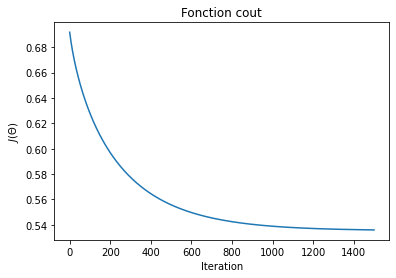

In [400]:
plt.plot(cost)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Fonction cout")

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

# Dessin de la limite de decision (Descision Boundary)
Dans cette partie, nous aimerions dessiner la ligne separatrice d nos données

In [404]:
def mapFeaturePlot(x1,x2,degree):
    """
    presque la meme que mapping(X) sauf qu'ici separation du X
     """
    out = np.ones(1)
    for i in range(1,degree+1):
        for j in range(i+1):
            terms= (x1**(i-j) * x2**j)
            out= np.hstack((out,terms))
    return out

def drawCircle():
    u_vals = np.linspace(-1,1,25)
    v_vals= np.linspace(-1,1,25)
    z=np.zeros((len(u_vals),len(v_vals)))
    for i in range(len(u_vals)):
        for j in range(len(v_vals)):
            z[i,j] =mapFeaturePlot(u_vals[i],v_vals[j],6) @ theta
    plt.contour(u_vals,v_vals,z.T,0)
    
    

# Classification (Prédiction)
Ici il serait interessant de calculer la prédiction en utilisant un seuil
i.e. si h>seuil alors classe =1 sinon classe = 0

In [273]:
def predict(X,theta):
    z= X.dot(theta) 
    y_pred= Sigmoid(z)
    return  np.array([1 if y > 0.5 else 0 for y in y_pred])


# Affichage 
Graphe representant les acceptations selon les caracteristiques

Text(0, 0.5, 'x 2')

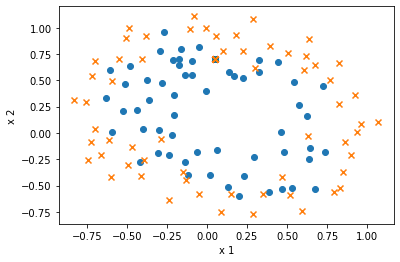

In [405]:
plt.scatter(X[np.where(y==1),1],X[np.where(y==1),2], label="y=1",marker ='o')
plt.scatter(X[np.where(y==0),1],X[np.where(y==0),2], label="y=0",marker ='x')

plt.xlabel('x 1')
plt.ylabel('x 2')

Traçage du coût en fonction de theta0 et theta1

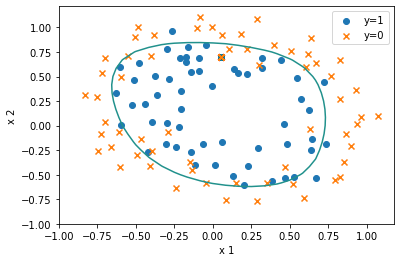

In [406]:



drawCircle()
# Plotting decision boundary
plt.scatter(X[np.where(y==1),1],X[np.where(y==1),2], label="y=1",marker ='o')
plt.scatter(X[np.where(y==0),1],X[np.where(y==0),2], label="y=0",marker ='x')

plt.xlabel('x 1')
plt.ylabel('x 2')

plt.legend(loc=0)





# Qualité du classifieur

Prédire des valeurs de y

Ici il serait interessant de calculer la précision de notre classifieur

Essayons de calculer ça avec 

moyenne(y==y-pred) * 100

Ceci donnera un pourcentage de precision

In [393]:
# calcul de precision = nombre de valeurs bien prédites (ici sur toute la base X)
y_pred=predict(X2,theta)
precision = np.mean(y==y_pred)*100
precision


50.847457627118644

# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [407]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

weights, params = [], []
X_train, X_test, y_train, y_test = train_test_split(data[:,0:2], data[:, 2], test_size=0.3, random_state=0)

sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)


X_test_std = sc.transform(X_test)
clf = LogisticRegression(penalty='l1', C=1, solver='liblinear')
clf.fit(X_train, y_train)

print('Training accuracy:', clf.score(X_train_std, y_train))
print('Test accuracy:', clf.score(X_test_std, y_test))
print('')

Training accuracy: 0.5609756097560976
Test accuracy: 0.5277777777777778



# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 01 Avril 2022 à 22h


In [ ]:
# bonne chance